In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "E:/Hackathon/SegmindAIChallenge/dataset/"
df_train = pd.read_csv(path + 'TRAIN.csv')
df_test = pd.read_csv(path + 'custom_df_test.csv')


C:\Users\basto\anaconda3\envs\tfgpu\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
712041,342,2,2013-10-01,10182,836,1,0,0,0
712042,343,2,2013-10-01,5352,588,1,0,0,0
712043,344,2,2013-10-01,6652,1043,1,0,0,1
712044,345,2,2013-10-01,3842,475,1,0,0,0


In [4]:
df_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day,Customers
0,767,0,0,1,2013,4,1,0.0
1,1111,1,0,0,2013,3,16,484.0
2,45,1,1,1,2013,8,1,729.0
3,500,1,0,1,2013,5,23,662.0
4,82,1,0,1,2013,8,6,619.0
...,...,...,...,...,...,...,...,...
305158,412,1,1,1,2013,5,28,775.0
305159,936,1,0,0,2013,3,2,644.0
305160,21,1,0,0,2013,9,16,581.0
305161,1077,1,0,0,2013,6,22,627.0


## Reduce 0's from trainset

In [5]:
# Reduce huge number of 0's in df_train

df_train['Sales'].value_counts()

0        122098
5674        163
5697        142
5723        142
6214        141
          ...  
770           1
19912         1
20623         1
18699         1
19737         1
Name: Sales, Length: 20727, dtype: int64

In [6]:
df_train = df_train.sample(frac = 1)

In [7]:
#filterzeros = df_train[df_train['Sales'] == 0][:100]

In [8]:
#filterzeros['Sales'].value_counts()

In [9]:
#df_train = df_train[df_train['Sales']!=0]

In [10]:
#xdf = pd.concat([df_train, filterzeros])

In [11]:
xdf = df_train.copy()

In [12]:
xdf['Sales'].value_counts()

0        122098
5674        163
5697        142
5723        142
6214        141
          ...  
770           1
19912         1
20623         1
18699         1
19737         1
Name: Sales, Length: 20727, dtype: int64

In [13]:
xdf = xdf.sample(frac = 1)
xdf = xdf.iloc[:305163]

In [14]:
xdf['Sales'].value_counts()

0        52232
6823        72
5697        70
5313        66
6217        66
         ...  
17729        1
1353         1
17985        1
17353        1
2047         1
Name: Sales, Length: 17824, dtype: int64

In [15]:
xdf.shape

(305163, 9)

In [16]:
df_test.shape

(305163, 8)

In [17]:
df_test.head(3)

,Store,Open,Promo,SchoolHoliday,Year,Month,Day,Customers
0,767,0,0,1,2013,4,1,0.0
1,1111,1,0,0,2013,3,16,484.0
2,45,1,1,1,2013,8,1,729.0


# Observe Dataset

In [18]:
xdf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
692675,1046,6,2013-10-19,5596,514,1,0,0,0
602741,312,2,2014-01-07,7406,625,1,1,0,1
354419,280,3,2014-08-27,4964,418,1,0,0,1
156752,653,5,2015-03-13,5601,503,1,0,0,0
245417,751,1,2014-12-22,5469,651,1,0,0,1


In [19]:
# Extract year, month and day from 'Date'

In [20]:
xdf['Date']

692675    2013-10-19
602741    2014-01-07
354419    2014-08-27
156752    2015-03-13
245417    2014-12-22
             ...    
22318     2015-07-11
277366    2014-11-18
616798    2013-12-26
12784     2015-07-20
278404    2014-11-17
Name: Date, Length: 305163, dtype: object

In [21]:
xdf['Date'] = pd.to_datetime(xdf['Date'])

In [22]:
xdf['Date']

692675   2013-10-19
602741   2014-01-07
354419   2014-08-27
156752   2015-03-13
245417   2014-12-22
            ...    
22318    2015-07-11
277366   2014-11-18
616798   2013-12-26
12784    2015-07-20
278404   2014-11-17
Name: Date, Length: 305163, dtype: datetime64[ns]

In [23]:
xdf['Year'] = xdf['Date'].dt.year
xdf['Month'] = xdf['Date'].dt.month
xdf['Day'] = xdf['Date'].dt.day


##df_test['Year'] = df_test['Date'].dt.year
#df_test['Month'] = df_test['Date'].dt.month
#df_test['Day'] = df_test['Date'].dt.day


In [24]:
xdf.drop('Date', axis = 1, inplace = True)
#df_test.drop('Date', axis = 1, inplace = True)

In [25]:
xdf.shape

(305163, 11)

In [26]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305163 entries, 692675 to 278404
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Sales          305163 non-null  int64 
 3   Customers      305163 non-null  int64 
 4   Open           305163 non-null  int64 
 5   Promo          305163 non-null  int64 
 6   StateHoliday   305163 non-null  object
 7   SchoolHoliday  305163 non-null  int64 
 8   Year           305163 non-null  int64 
 9   Month          305163 non-null  int64 
 10  Day            305163 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 27.9+ MB


In [27]:
xdf['StateHoliday'].values

array(['0', '0', 0, ..., 'c', '0', '0'], dtype=object)

In [28]:
xdf['StateHoliday'].value_counts()

0    239284
0     56025
a      6242
b      1888
c      1724
Name: StateHoliday, dtype: int64

In [29]:
#df_test['StateHoliday'].value_counts()

In [30]:
xdf['StateHoliday'] = xdf['StateHoliday'].replace({'0':'0','a':'1','b':'1','c':'1'})

In [31]:
xdf['StateHoliday'].value_counts()

0    239284
0     56025
1      9854
Name: StateHoliday, dtype: int64

In [32]:
#df_test['StateHoliday'] = df_test['StateHoliday'].replace({'a':'1','b':'1'})

In [33]:
xdf['StateHoliday'] = pd.to_numeric(xdf['StateHoliday'])

In [34]:
#df_test['StateHoliday'] = pd.to_numeric(df_test['StateHoliday'])

In [35]:
# let's recheck 

xdf['StateHoliday'].value_counts()

0    295309
1      9854
Name: StateHoliday, dtype: int64

In [36]:
#df_test['StateHoliday'].value_counts()

This need to be converted to Numeric and fixed.

In [37]:
# school holiday

xdf['SchoolHoliday'].value_counts()

0    252831
1     52332
Name: SchoolHoliday, dtype: int64

In [38]:
xdf.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
dtype: int64

<AxesSubplot:>

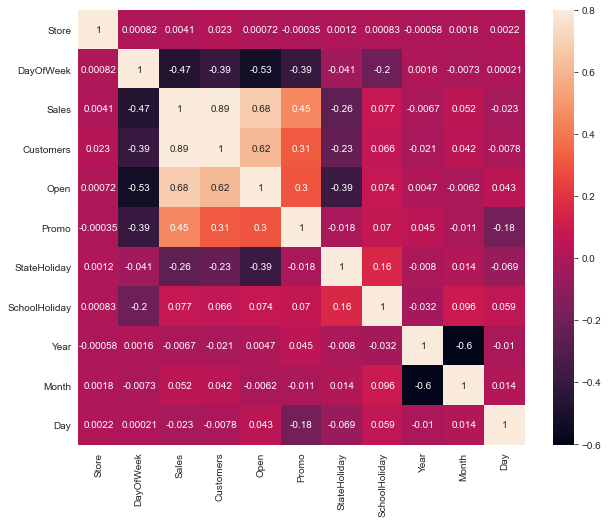

In [39]:
corr = xdf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True)

# Exploratory Data Analaysis

In [40]:
xdf['Open'].value_counts()

1    252947
0     52216
Name: Open, dtype: int64

## Univariate (Target Attribute)

In [41]:
xdf['Sales'].value_counts()

0        52232
6823        72
5697        70
5313        66
6217        66
         ...  
17729        1
1353         1
17985        1
17353        1
2047         1
Name: Sales, Length: 17824, dtype: int64

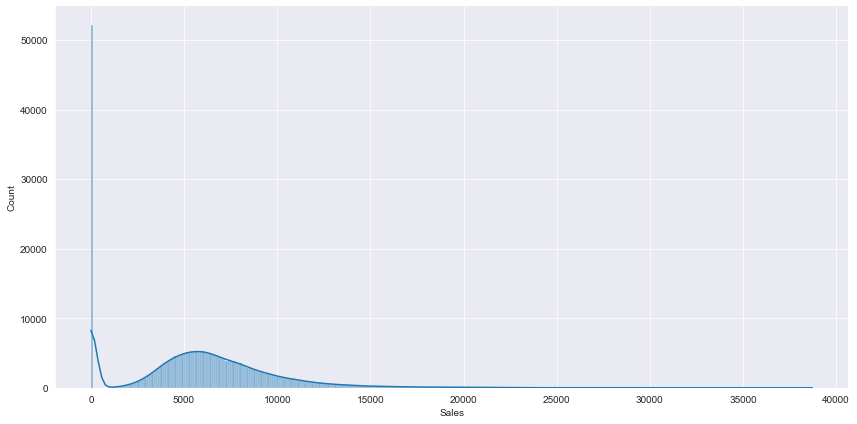

In [42]:
## Lets check its distribution

sns.displot(x = 'Sales', data = xdf, aspect = 2, height = 6, kde = True);

In [43]:
# Skew and kurt
print("Skewness: %f" % xdf['Sales'].skew())
print("Kurtosis: %f" % xdf['Sales'].kurt())

Skewness: 0.638425
Kurtosis: 1.757683


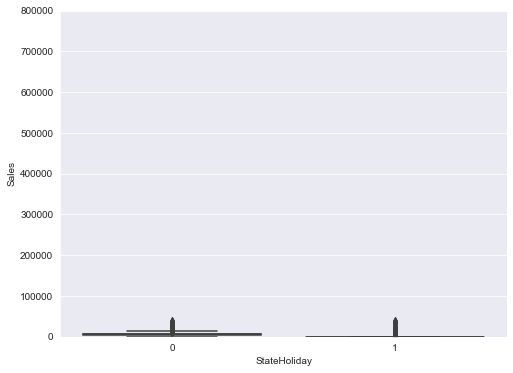

In [44]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['StateHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['StateHoliday'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

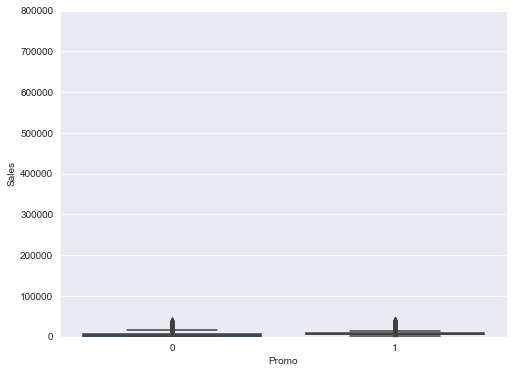

In [45]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['Promo']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['Promo'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

In [46]:
xdf['Sales'].value_counts()

0        52232
6823        72
5697        70
5313        66
6217        66
         ...  
17729        1
1353         1
17985        1
17353        1
2047         1
Name: Sales, Length: 17824, dtype: int64

# Feature Engineering

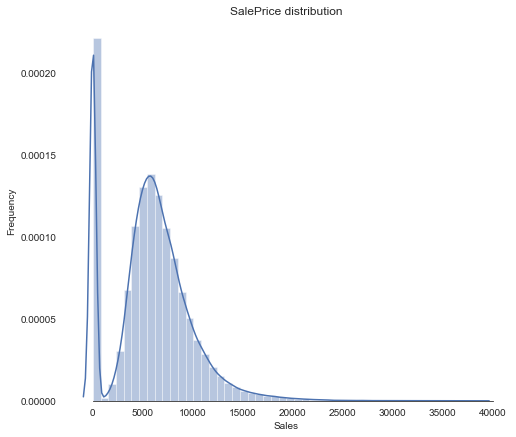

In [47]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The Sales is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) transform to fix the skew.

In [48]:
from scipy.stats import skew, norm

In [49]:
xdf['Sales'] = np.log1p(xdf['Sales'])


 mu = 7.28 and sigma = 3.33



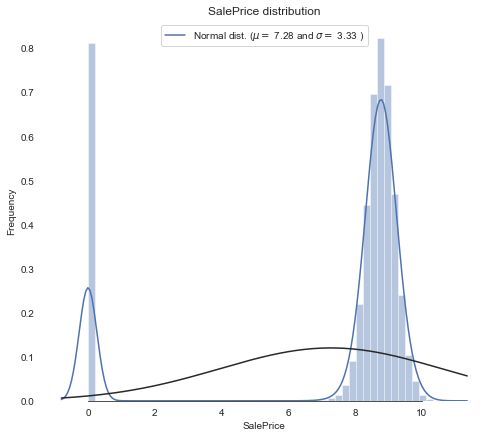

In [50]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(xdf['Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [51]:
xdf.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
dtype: int64

## Correlation

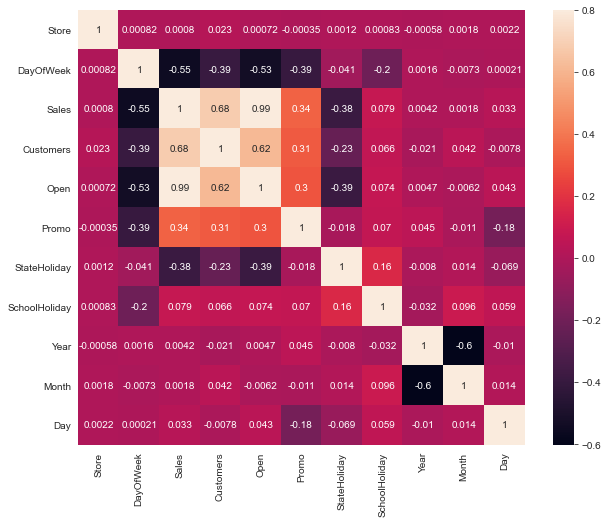

In [52]:
# Let's check the correlation of the feature with target

corr = xdf.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True);

In [53]:
xdf.drop(['DayOfWeek','StateHoliday'], axis = 1, inplace = True)

In [54]:
#df_test.drop(['DayOfWeek'], axis = 1, inplace = True)

# Dataset Preparation

In [55]:
# Splitting the dataset

X = xdf.drop(['Sales'], axis =1)
y = xdf['Sales']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [59]:
(X_train.shape, X_test.shape)

((244130, 8), (61033, 8))

In [60]:
X_test

,Store,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
138059,915,610,1,1,1,2015,3,30
440262,623,1028,1,1,0,2014,6,2
593552,43,523,1,0,0,2014,1,15
555347,863,846,1,1,0,2014,2,19
191890,111,517,1,0,0,2015,2,9
...,...,...,...,...,...,...,...,...
344216,373,0,0,0,0,2014,9,7
144046,212,351,1,0,0,2015,3,24
311620,526,0,0,0,0,2014,10,12
132249,680,1240,1,0,0,2015,4,4


In [61]:
df_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day,Customers
0,767,0,0,1,2013,4,1,0.0
1,1111,1,0,0,2013,3,16,484.0
2,45,1,1,1,2013,8,1,729.0
3,500,1,0,1,2013,5,23,662.0
4,82,1,0,1,2013,8,6,619.0
...,...,...,...,...,...,...,...,...
305158,412,1,1,1,2013,5,28,775.0
305159,936,1,0,0,2013,3,2,644.0
305160,21,1,0,0,2013,9,16,581.0
305161,1077,1,0,0,2013,6,22,627.0


In [62]:
first_col = df_test.pop("Customers")

df_test.insert(1, "Customers", first_col)

In [63]:
df_test

,Store,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
0,767,0.0,0,0,1,2013,4,1
1,1111,484.0,1,0,0,2013,3,16
2,45,729.0,1,1,1,2013,8,1
3,500,662.0,1,0,1,2013,5,23
4,82,619.0,1,0,1,2013,8,6
...,...,...,...,...,...,...,...,...
305158,412,775.0,1,1,1,2013,5,28
305159,936,644.0,1,0,0,2013,3,2
305160,21,581.0,1,0,0,2013,9,16
305161,1077,627.0,1,0,0,2013,6,22


### Preprocessing

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
ct = ColumnTransformer([
                ('scaler', StandardScaler(),['Store','Customers','Year','Month','Day'])
], remainder = 'passthrough')

# Modeling and Evaluation Metrics

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr = LinearRegression()
lr_pipe = Pipeline([
            ('column-transformer', ct),
            ('LinearRegression', lr)
])

In [69]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Customers', 'Year',
                                                   'Month', 'Day'])])),
                ('LinearRegression', LinearRegression())])

In [70]:
lr_pred = lr_pipe.predict(X_test)

In [71]:
print("R2 Score:", r2_score(y_test, lr_pred))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test, lr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_pred)))

R2 Score: 0.9950112863089915
Mean Squarred Error: 0.055
RMSE: 0.23467358677965622
Mean Absolute Error : 0.16261948356183645


## GradientBoostingRegressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor


In [73]:
gbr = GradientBoostingRegressor()

In [74]:
gbr_pipe = Pipeline([
            ('column-transformer', ct),
            ('GradientBoostingRegressor', gbr)
])

In [75]:
gbr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Customers', 'Year',
                                                   'Month', 'Day'])])),
                ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [76]:
gbr_pred = gbr_pipe.predict(X_test)

In [77]:
print("R2 Score:", r2_score(y_test, gbr_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,gbr_pred)))

R2 Score: 0.9972546648214737
Mean Squarred Error: 0.030306460475491622
RMSE: 0.17408750809719697
Mean Absolute Error : 0.1283326853363149


In [78]:
## Hyperparamter Tuning

## XGBoost

In [79]:
from xgboost import XGBRegressor

In [80]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.05)
xgb_pipe = Pipeline([
            ('column-transformer', ct),
            ('XGBRegression', xgb)
])

In [81]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Customers', 'Year',
                                                   'Month', 'Day'])])),
                ('XGBRegression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda

In [82]:
xgb_pred = xgb_pipe.predict(X_test)

In [83]:
print("R2 Score:", r2_score(y_test, xgb_pred))
print("Mean Squarred Error: %.3f " % mean_squared_error(y_test, xgb_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, xgb_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,xgb_pred)))

R2 Score: 0.9972034018965031
Mean Squarred Error: 0.031 
RMSE: 0.17570533593699877
Mean Absolute Error : 0.12868552917979895


In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [218]:
df_test.shape, xdf.shape

((305163, 8), (305163, 9))

In [219]:
output = pd.DataFrame(columns = ['Index','Sales'])

In [220]:
output['Index'] = df_test.index

In [221]:
output

,Index,Sales
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
305158,305158,NaN
305159,305159,NaN
305160,305160,NaN
305161,305161,NaN


In [222]:
df_train['Sales']

416334    4280
161432    3793
479295    6013
539444    6644
515776    4276
          ... 
148616    5002
640478    8901
11440     6722
544227    5773
261850    9899
Name: Sales, Length: 589948, dtype: int64

In [244]:
output['Sales'] = np.floor(np.expm1(gbr_pipe.predict(df_test)))

In [246]:
output['Sales'].value_counts()

0.0        50754
7634.0      1280
5351.0      1235
5504.0      1047
5525.0       987
           ...  
9355.0         1
9306.0         1
4296.0         1
11915.0        1
9874.0         1
Name: Sales, Length: 5107, dtype: int64

In [247]:
output

,Index,Sales
0,0,0.0
1,1,4832.0
2,2,7568.0
3,3,5720.0
4,4,5725.0
...,...,...
305158,305158,8460.0
305159,305159,5824.0
305160,305160,5258.0
305161,305161,5415.0


In [248]:
output.to_csv('output6.csv', index = False)

In [ ]:
mysub= pd.read_csv('output.csv')

In [ ]:
mysub

,Index,Sales
0,0,0.0
1,1,3523.0
2,2,7205.0
3,3,5211.0
4,4,5219.0
...,...,...
305158,305158,7929.0
305159,305159,5246.0
305160,305160,5194.0
305161,305161,4781.0


## 2,321.8847 << Public Score